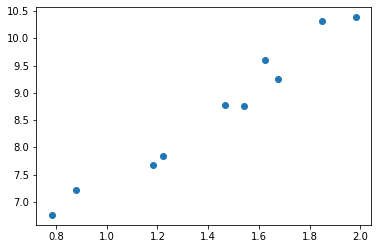

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(10, 1)
Y = 4 + 3 * X + np.random.rand(10, 1)
plt.plot(X, Y, 'o')


In [4]:
# Add 1s the first column of X values - this is because the first feature is the bias, and the second feature is the weight of X
X_b = np.c_[np.ones((10, 1)), X]

# Calculate the best linear params using the normal equation
lin_params = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(lin_params)

[[4.21611011]
 [3.12963979]]


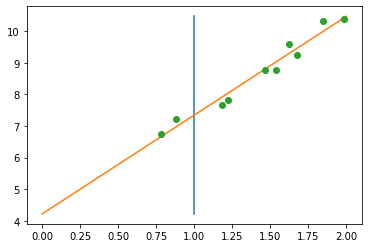

In [5]:
# plot the linear model line against the data
X_ends = np.c_[np.ones((2, 1)), np.array([[0], [2]])]
Y_ends = X_ends.dot(lin_params)
plt.plot(X_ends, Y_ends)
plt.plot(X, Y, 'o')
plt.show()

In [6]:
# Dot product of X and Xt
XtX = X_b.T.dot(X_b)
print(XtX)

[[10.         14.19747534]
 [14.19747534 21.57361372]]


In [7]:
XtX_inv = np.linalg.inv(XtX)
print(XtX_inv)

[[ 1.52271815 -1.00209235]
 [-1.00209235  0.70582433]]


In [8]:
XtY = X_b.T.dot(Y)
print(XtY)

[[ 86.59408486]
 [127.37575926]]


In [9]:
final_params = XtX_inv.dot(XtY)
print(final_params)

[[4.21611011]
 [3.12963979]]


In [10]:
predict = final_params[0][0] + final_params[1][0] * 1
print(predict)

7.345749901440028
